# Ford GoBike Data Visualization and Analysis

### Introduction
> This project is analyzing the Ford GoBike system data from 2017-1 to 2018-10. The goal of the project is to explore some insights about the trip and user and help team make the decision about the operations and marketing strategy.
>

### Table of Content

1. [Questions](#q)
2. [Data Wrangling](#w)
3. [Data Visualization](#v)
4. [Insights and Conclusions](#i)

## 2. Data Wrangling <a name="w"></a>

In [139]:
## Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [140]:
# Load the 10 csv file in the same folder.
import re

path = '/Users/amandaxiao/Desktop/Udacity/Projects/Project_5' #待读取文件的文件夹绝对地址
files = [f for f in os.listdir(path) if re.match(r'[0-9]+.*\.csv', f)]

df=pd.DataFrame()

for file in files:
    a=pd.read_csv(file, )
    df=df.append(a)
    

In [141]:
# Reset index
bike=df.reset_index(drop=True)

In [142]:
# Check the rows and columns in the dataset.
bike.shape
print("There are {a} rows and {b} columns in the dataset".format(a=df.shape[0], b=df.shape[1]))

There are 1916465 rows and 16 columns in the dataset


In [143]:
# Check the datatype of df
bike.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [144]:
bike.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id             9739
start_station_name           9739
start_station_latitude          0
start_station_longitude         0
end_station_id               9739
end_station_name             9739
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          158496
member_gender              158080
bike_share_for_all_trip    519700
dtype: int64

There are 150K missing value in the birth_year and gender which doesn't account for a large portion of the dataset.

In [145]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.916465e+06,1.906726e+06,1.916465e+06,1.916465e+06,1.906726e+06,1.916465e+06,1.916465e+06,1.916465e+06,1.757969e+06
mean,9.412173e+02,1.110024e+02,3.776831e+01,-1.223532e+02,1.091323e+02,3.776845e+01,-1.223527e+02,2.073052e+03,1.982196e+03
std,2.800558e+03,9.533863e+01,1.005044e-01,1.609312e-01,9.515778e+01,1.004009e-01,1.605616e-01,1.179333e+03,1.053493e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.881000e+03
25%,3.600000e+02,3.000000e+01,3.777166e+01,-1.224114e+02,2.800000e+01,3.777176e+01,-1.224094e+02,1.079000e+03,1.977000e+03
50%,5.690000e+02,8.100000e+01,3.778165e+01,-1.223974e+02,7.900000e+01,3.778175e+01,-1.223974e+02,2.116000e+03,1.985000e+03
75%,8.960000e+02,1.760000e+02,3.779539e+01,-1.222948e+02,1.760000e+02,3.779539e+01,-1.222948e+02,3.020000e+03,1.990000e+03
max,8.636900e+04,3.740000e+02,4.551000e+01,-7.357000e+01,3.740000e+02,4.551000e+01,-7.357000e+01,4.466000e+03,2.000000e+03


**Data Issues**
1. Bike_share_for all_trip is not very related to the analysis so I will remove it.
2. The data type of start time and end time is not correct.
3. Missing value in gender, birth_year, station_id and station name.
4. duration sec is not easy to understand so need to convert into minute.
5. There are some outliers in duration_sec and member_birth_year.
6. Birth year is not very understandable so we can transform it into age.

### Clean

In [146]:
# 1. Delete bike_share_for_all_trip column
bike.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

In [147]:
# 2. change the data type of start time and end time
bike.start_time=pd.to_datetime(bike.start_time)
bike.end_time=pd.to_datetime(bike.end_time)

In [148]:
# Check new data type
bike.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
dtype: object

In [149]:
# 3. Drop missing value
bike.dropna(inplace=True)

In [150]:
# Check are there any missing value
bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
dtype: int64

In [151]:
# 4. Change the seconds to minutes
bike['duration_mins']=bike['duration_sec']/60
bike.duration_mins=bike.duration_mins.astype(int)

In [152]:
#Delete duration_sec column
bike.drop(['duration_sec'], axis=1, inplace=True)

In [153]:
# Check the new dataset
bike.head(2)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_mins
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,9
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,15


In [154]:
#5. Delete the value less than 1940 in member_birth_year and delete duration mins>180 mins.
bike=bike.loc[(bike['member_birth_year']>=1940)&(bike['duration_mins']<=180)]

In [155]:
# Check the new descriptive statitics.
bike.describe()

,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,duration_mins
count,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06,1.739999e+06
mean,1.119385e+02,3.776996e+01,-1.223548e+02,1.099850e+02,3.777006e+01,-1.223542e+02,2.075966e+03,1.982269e+03,1.115807e+01
std,9.496192e+01,9.646683e-02,1.148724e-01,9.469924e+01,9.632799e-02,1.143094e-01,1.177183e+03,1.021840e+01,1.129814e+01
min,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.000000e+01,1.940000e+03,1.000000e+00
25%,3.000000e+01,3.777166e+01,-1.224114e+02,3.000000e+01,3.777176e+01,-1.224094e+02,1.083000e+03,1.977000e+03,5.000000e+00
50%,8.100000e+01,3.778127e+01,-1.223974e+02,8.100000e+01,3.778175e+01,-1.223971e+02,2.121000e+03,1.985000e+03,9.000000e+00
75%,1.780000e+02,3.779539e+01,-1.222948e+02,1.760000e+02,3.779539e+01,-1.222948e+02,3.028000e+03,1.990000e+03,1.300000e+01
max,3.740000e+02,3.788022e+01,-1.218333e+02,3.740000e+02,3.788022e+01,-1.218333e+02,4.466000e+03,2.000000e+03,1.800000e+02


In [156]:
#6. Conver the birth_year to Age.
bike['member_age']=2018-bike['member_birth_year']
bike.drop(['member_birth_year'], axis=1, inplace=True)

In [162]:
bike.member_age.describe()

count    1.739999e+06
mean     3.573128e+01
std      1.021840e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      7.800000e+01
Name: member_age, dtype: float64

In [165]:
bins=[18,35,55,75]

bike['age_group']=pd.cut(bike.member_age, bins, labels=['18~35','36~55','56~75'])

In [166]:
bike.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,duration_mins,member_age,age_group
0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,Male,9,30.0,18~35
1,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,Male,15,31.0,18~35
4,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,Female,14,42.0,36~55
5,2018-02-28 23:14:19.170,2018-02-28 23:29:40.437,312.0,San Jose Diridon Station,37.329732,-121.901782,288.0,Mission St at 1st St,37.350964,-121.902016,2656,Customer,Male,15,21.0,18~35
6,2018-02-28 23:21:49.274,2018-02-28 23:26:27.222,316.0,San Salvador St at 1st St,37.330165,-121.885831,310.0,San Fernando St at 4th St,37.335885,-121.885660,1616,Subscriber,Female,4,61.0,56~75


In [167]:
# Save the clean dataset in to bike_new.csv
bike.to_csv('bike_new.csv')

## Data Visualization and Analysis <a name="v"></a>

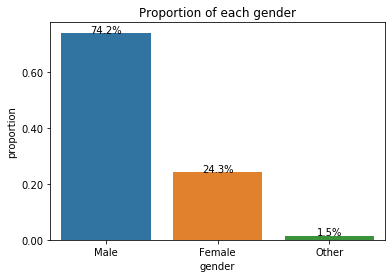

In [205]:
# User Information
n_points=bike.shape[0]
max_count=bike.member_gender.value_counts().max()
max_prop=max_count/n_points

# Generate tick mark locations and names
tick_props=np.arange(0, max_prop, 0.2)
tick_names=['{:0.2f}'.format(v) for v in tick_props]

# create plot

sns.countplot(data=bike, x='member_gender')
plt.yticks(tick_props*n_points, tick_names)
plt.ylabel('proportion')
plt.xlabel('gender')
plt.title('Proportion of each gender')


# Add annotation
gender_count=bike.member_gender.value_counts()
locs, labels=plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_count[label.get_text()] 
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count, pct_string, ha = 'center', color = 'black')

74.2% of users are male and 24.3% of users are female, others only account for 1.5%.

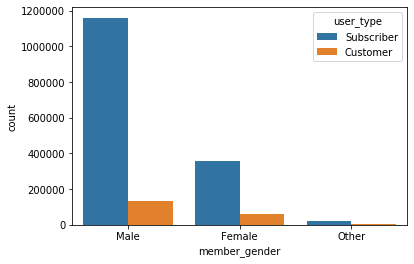

In [198]:
sns.countplot(data=bike, x='member_gender', hue='user_type')

Here, we can conclude in each gender, the subscriber take a big proportion, so we need to take more effort to the user experience for subscibers.

Text(0.5, 1.0, 'Frequency of durations')

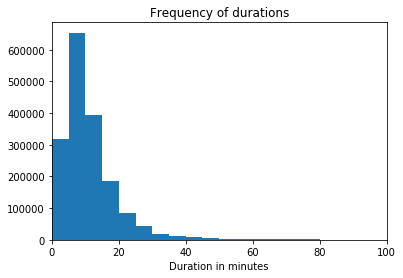

In [158]:
## 1. Check the distribution of duration minutes
bins=np.arange(0, bike.duration_mins.max()+5, 5)

plt.hist(bike.duration_mins, bins=bins)
plt.xlim(0,100)
plt.xlabel("Duration in minutes")
plt.title("Frequency of durations")

In this image, we can see that the duration of most users are less then 20 mins.

Text(0.5, 1.0, 'Boxplot for duration by user_type')

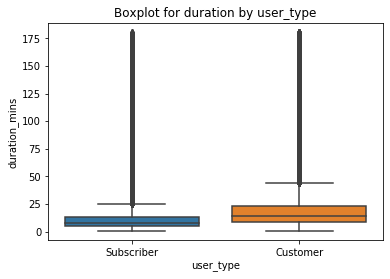

In [174]:
## Duration for different user type
sns.boxplot(data=bike, x='user_type',y='duration_mins')
plt.title("Boxplot for duration by user_type")

The duration median of customer is higher than duration median for subscriber. In general, customer has longer duration for each trip than subscriber. For the records whose duration is less than 75, the median of duration for customer is around 15 mins whereas the median of duration for subscriber is less than 10 mins. 

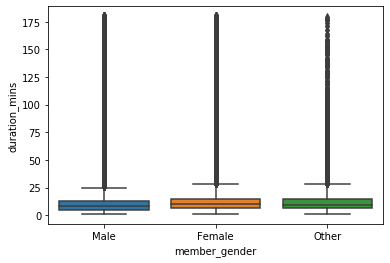

In [176]:
# Check the duration for different gender
sns.boxplot(data=bike, x='member_gender', y='duration_mins')

In this image, we can see the median duration for female is higher than other gender.

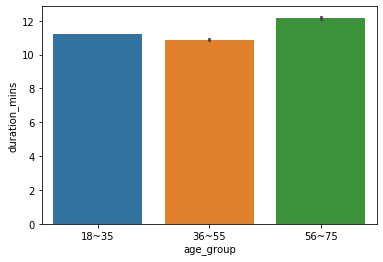

In [180]:
# Check the duration for different age group
sns.barplot(data=bike, x='age_group', y='duration_mins')